# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
Coach price min:  44.42 , max:  593.635 , average:  376.585253

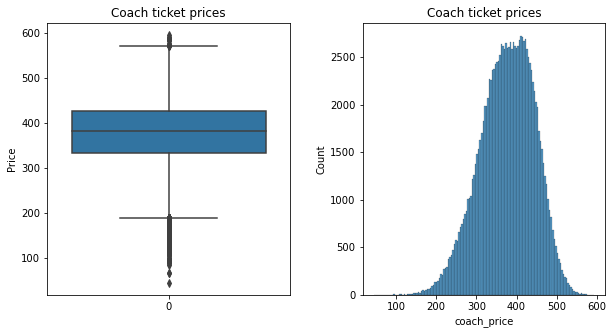

<Figure size 432x288 with 0 Axes>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("E:\\Semo4ka\\Python\\CodeCademy\\Airline analysis\\flight.csv")
print(flight.head())

## Task 1

coach_price = flight.coach_price
coach_price_min = np.round(np.min(coach_price), 2)
coach_price_max = np.round(np.max(coach_price), 2)
coach_price_mean = np.round(np.mean(coach_price), 2)
print('Coach price min: ', coach_price_min, ', max: ', coach_price_max, ', average: ', coach_price_mean)

fig = plt.figure(figsize = (10, 5))
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(data = coach_price)
plt.ylabel('Price')
plt.title('Coach ticket prices')

ax2 = plt.subplot(1, 2, 2)
sns.histplot(coach_price)
plt.title('Coach ticket prices')
plt.subplots_adjust(wspace = 0.3)
plt.show()
plt.clf()


2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

Coach price for 8 hour flight min:  170.77 , max:  593.64 , average:  431.83


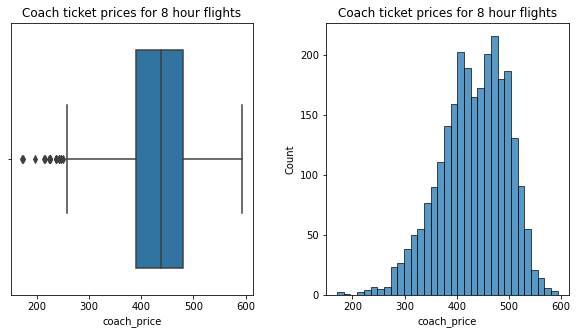

<Figure size 432x288 with 0 Axes>

In [11]:
## Task 2

coach_price_8 = flight.coach_price[flight.hours == 8]
coach_price_min8 = np.round(np.min(coach_price_8), 2)
coach_price_max8 = np.round(np.max(coach_price_8), 2)
coach_price_mean8 = np.round(np.mean(coach_price_8), 2)
print('Coach price for 8 hour flight min: ', coach_price_min8, ', max: ', coach_price_max8, ', average: ', coach_price_mean8)

fig = plt.figure(figsize = (10, 5))
ax1 = plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace = 0.3)
sns.boxplot(x = coach_price_8)
plt.title('Coach ticket prices for 8 hour flights')

ax2 = plt.subplot(1, 2, 2)
sns.histplot(x = coach_price_8)
plt.title('Coach ticket prices for 8 hour flights')
plt.show()
plt.clf()



3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

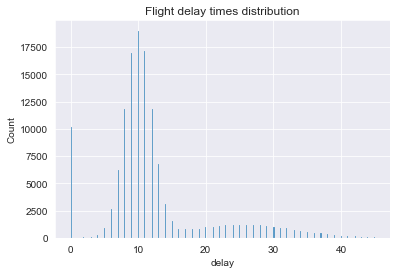

<Figure size 432x288 with 0 Axes>

In [6]:
## Task 3
sns.set_style('darkgrid')
sns.histplot(flight.delay[flight.delay <= 45])
plt.title('Flight delay times distribution')
plt.show()
plt.clf()



## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

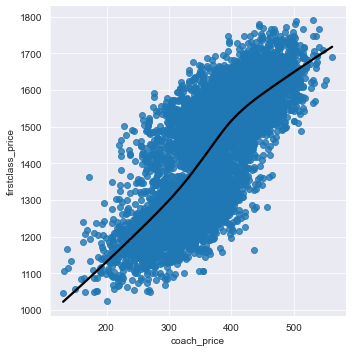

<Figure size 432x288 with 0 Axes>

In [18]:
## Task 4
perc = 0.05
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()



5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

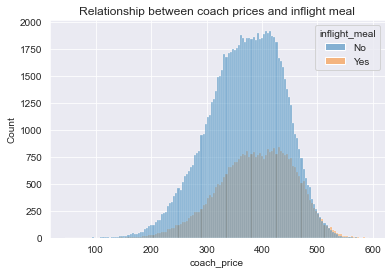

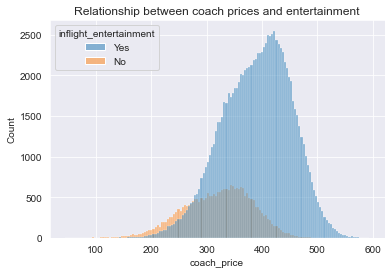

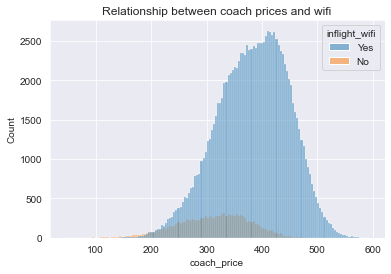

<Figure size 432x288 with 0 Axes>

In [14]:
## Task 5
sns.histplot(flight, x = 'coach_price', hue = flight.inflight_meal)
plt.title('Relationship between coach prices and inflight meal')
plt.show()
plt.clf()

sns.histplot(flight, x = 'coach_price', hue = flight.inflight_entertainment)
plt.title('Relationship between coach prices and entertainment')
plt.show()
plt.clf()

sns.histplot(flight, x = 'coach_price', hue = flight.inflight_wifi)
plt.title('Relationship between coach prices and wifi')
plt.show()
plt.clf()


6. How does the number of passengers change in relation to the length of flights?

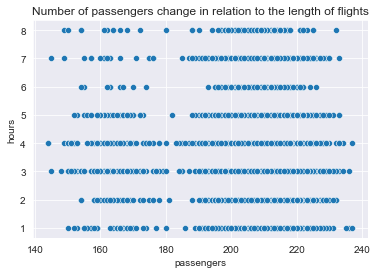

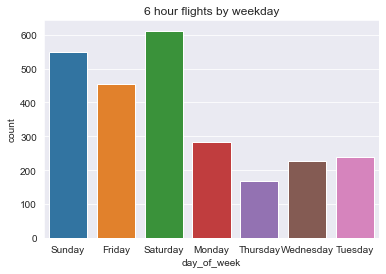

              miles   passengers        delay inflight_meal  \
count   2532.000000  2532.000000  2532.000000          2532   
unique          NaN          NaN          NaN             2   
top             NaN          NaN          NaN            No   
freq            NaN          NaN          NaN          1754   
mean    3200.107425   207.379937    12.857425           NaN   
std      139.663578    13.090369    30.828924           NaN   
min     3025.000000   139.000000     0.000000           NaN   
25%     3085.000000   204.000000     9.000000           NaN   
50%     3164.000000   209.000000    10.000000           NaN   
75%     3281.000000   215.000000    13.000000           NaN   
max     3575.000000   239.000000  1512.000000           NaN   

       inflight_entertainment inflight_wifi day_of_week redeye weekend  \
count                    2532          2532        2532   2532    2532   
unique                      2             2           7      2       2   
top                  

<Figure size 432x288 with 0 Axes>

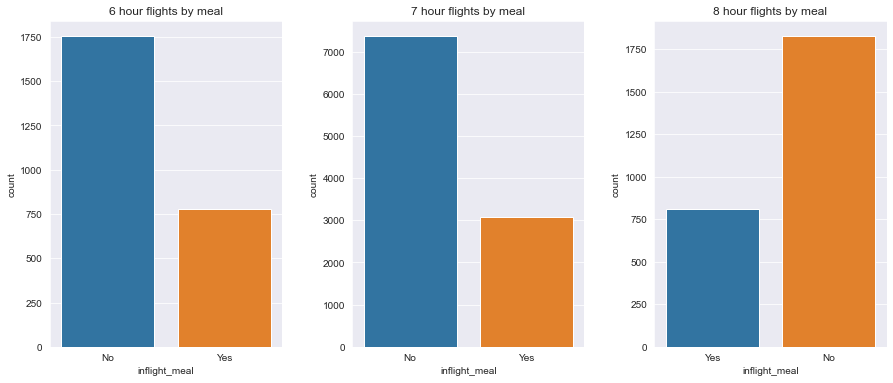

<Figure size 432x288 with 0 Axes>

In [16]:
## Task 6
sns.set_style('darkgrid')
perc = 0.05
flight_sub = flight.sample(n = int(flight.shape[0]*perc)) #take a random subset of the data.

sns.scatterplot(x = flight_sub.passengers, y = flight_sub.hours)
plt.title('Number of passengers change in relation to the length of flights')
plt.show()
plt.clf()

#flight_6 = flight.day_of_week[flight.hours == 6]
sns.countplot(x = flight.day_of_week[flight.hours == 6])
plt.title('6 hour flights by weekday')
plt.show()
plt.clf()

print(flight[flight.hours == 6].describe(include ='all'))

fig = plt.figure(figsize = (15, 6))
ax1 = plt.subplot(1, 3, 1)
plt.subplots_adjust(wspace = 0.3)
sns.countplot(x = flight.inflight_meal[flight.hours == 6])
plt.title('6 hour flights by meal')

ax2 = plt.subplot(1, 3, 2)
sns.countplot(x = flight.inflight_meal[flight.hours == 7])
plt.title('7 hour flights by meal')

ax3 = plt.subplot(1, 3, 3)
sns.countplot(x = flight.inflight_meal[flight.hours == 8])
plt.title('8 hour flights by meal')
plt.show()
plt.clf()



## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

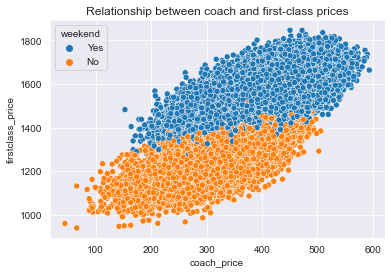

<Figure size 432x288 with 0 Axes>

In [17]:
## Task 7
sns.scatterplot(x = flight.coach_price, y = flight.firstclass_price, hue = flight.weekend)
plt.title('Relationship between coach and first-class prices')
plt.show()
plt.clf()


8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

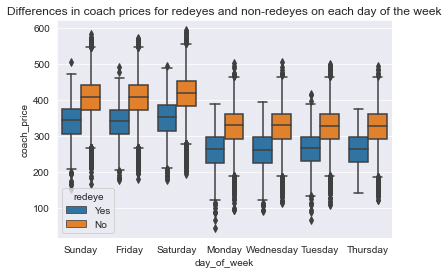

In [19]:
## Task 8
sns.boxplot(data = flight, x = 'day_of_week', y = 'coach_price', hue = flight.redeye)
plt.title('Differences in coach prices for redeyes and non-redeyes on each day of the week')
plt.show()


